# Calculate 3-body rates

In [53]:
import matplotlib.pyplot as plt
from numpy import *
import scipy
from scipy.integrate import quad, dblquad, tplquad

import warnings
warnings.filterwarnings("ignore")

## set up the functions to 3D integrations

f_bar_function(0) = 1.0
g_integrand(xi_0, y_0, z_0, eps_1, eps_2) =  0.0
g_integrand(xi_1, y_1, z_1, eps_1, eps_2) =  8.608040076769528e-82
g_integrand(xi_m, y_m, z_m, eps_1, eps_2) =  0.0006032980459949079
h_integrand(xi_0, y_0, z_0, eps_1, eps_2) =  0.0
h_integrand(xi_1, y_1, z_1, eps_1, eps_2) =  0.0
h_integrand(xi_m, y_m, z_m, eps_1, eps_2) =  0.0024131921839796316


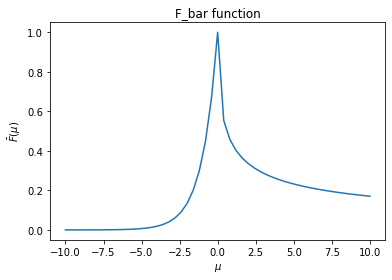

In [148]:
# small number
small_number = 1.0e-8

# limits for \xi
xi_0 = 0.0
xi_1 = pi / 2.0
# limits for y
y_0 = -1.0
y_1 = 1.0
# limits for z
z_0 = 0.001
z_1 = 1.0

# example values
eps_s = 4.0
rc_b = 0.03
rho_0 = 2.0 / 3.0
eps_0 = eps_s**(1.5) * rc_b / sqrt(2.0)
eps_1 = 1.0 / rho_0
eps_2 = sqrt(4.0) * eps_1

def f_bar_function(mu):
    value = exp(minimum(0.0, mu))
    value *= scipy.special.erfcx(sqrt(maximum(0.0, mu)))
    return value

def h_integrand(xi, y, z, eps_1, eps_2):
    value = cos(xi)**2
    value *= sqrt( abs(1.0 - y**2))
    x = sqrt( abs(eps_1**2 * cos(xi)**4 + z**2 - 2.0 * eps_1 * y * z * cos(xi)**2))
    mu = eps_2**2 * (z - x) / eps_1 / ((x + small_number) * (z + small_number))
#     print('mu = ',mu)
    value *= f_bar_function(mu)
    return value
    
def g_integrand(xi, y, z, eps_1, eps_2):
    value = sin(xi)
    value *= cos(xi)**5
    x = sqrt( abs(eps_1**2 * cos(xi)**4 + z**2 - 2.0 * eps_1 * y * z * cos(xi)**2))
    mu = eps_2**2 * (z - x) / eps_1 / ((x + small_number) * (z + small_number))
#     print('mu = ',mu)
    value *= f_bar_function(mu)
#     print('f_bar = ',f_bar_function(mu))
    return value
    
print('f_bar_function(0) = ' + str(f_bar_function(0.0)))
x = linspace(-10.0, 10.0, num=51)
y = f_bar_function(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel=r'$\mu$', ylabel=r'$\bar{F}(\mu)$',
       title='F_bar function')

print('g_integrand(xi_0, y_0, z_0, eps_1, eps_2) = ', g_integrand(xi_0, y_0, z_0, eps_1, eps_2))
print('g_integrand(xi_1, y_1, z_1, eps_1, eps_2) = ', g_integrand(xi_1, y_1, z_1, eps_1, eps_2))
print('g_integrand(xi_m, y_m, z_m, eps_1, eps_2) = ', g_integrand((xi_0+xi_1)/2.0, (y_0+y_1)/2.0, (z_0+z_1)/2.0, eps_1, eps_2))

print('h_integrand(xi_0, y_0, z_0, eps_1, eps_2) = ', h_integrand(xi_0, y_0, z_0, eps_1, eps_2))
print('h_integrand(xi_1, y_1, z_1, eps_1, eps_2) = ', h_integrand(xi_1, y_1, z_1, eps_1, eps_2))
print('h_integrand(xi_m, y_m, z_m, eps_1, eps_2) = ', h_integrand((xi_0+xi_1)/2.0, (y_0+y_1)/2.0, (z_0+z_1)/2.0, eps_1, eps_2))


In [21]:
eps_1 = 0.001
eps_2 = 0.1

g_bar = tplquad(g_integrand, z_0, z_1, lambda r:   y_0, lambda r:   y_1,
                                       lambda r,t: xi_0, lambda r,t: xi_1,
                                       args=(eps_1, eps_2), epsabs=1.0e-4, epsrel=1.0e-4)[0]
print(eps_1, eps_2, g_bar)

0.001 0.1 0.2864073953298263


## form the 2D matrix of $\bar{g}(\epsilon_1,\epsilon_2)$

In [23]:
eps_1_min = 0.001
eps_1_max = 1.5
eps_1_num = 10

eps_2_min = 0.0
eps_2_max = 4.0
eps_2_num = 20

eps_1_values = linspace(eps_1_min, eps_1_max, num=eps_1_num)
eps_2_values = linspace(eps_2_min, eps_2_max, num=eps_2_num)
g_bar = zeros((eps_1_num, eps_2_num))

for i, eps_1 in enumerate(eps_1_values):
    for j, eps_2 in enumerate(eps_2_values):
        g_bar[i,j] = tplquad(g_integrand, z_0, z_1, lambda r:   y_0, lambda r:   y_1,
                                                    lambda r,t: xi_0, lambda r,t: xi_1,
                                                    args=(eps_1, eps_2), epsabs=1.0e-4, epsrel=1.0e-4)[0]
        print('i, j, eps_1, eps_2, gbar = ',i, j, eps_1, eps_2, g_bar[i,j])      

i, j, eps_1, eps_2, gbar =  0 0 0.001 0.0 0.333
i, j, eps_1, eps_2, gbar =  0 1 0.001 0.21052631578947367 0.25148695549893463
i, j, eps_1, eps_2, gbar =  0 2 0.001 0.42105263157894735 0.20165854828696467
i, j, eps_1, eps_2, gbar =  0 3 0.001 0.631578947368421 0.1646015898671349
i, j, eps_1, eps_2, gbar =  0 4 0.001 0.8421052631578947 0.13612561985790303
i, j, eps_1, eps_2, gbar =  0 5 0.001 1.0526315789473684 0.11401600717923717
i, j, eps_1, eps_2, gbar =  0 6 0.001 1.263157894736842 0.09676920792869868
i, j, eps_1, eps_2, gbar =  0 7 0.001 1.4736842105263157 0.08325219004819231
i, j, eps_1, eps_2, gbar =  0 8 0.001 1.6842105263157894 0.07258574929581088
i, j, eps_1, eps_2, gbar =  0 9 0.001 1.894736842105263 0.06408805756088741
i, j, eps_1, eps_2, gbar =  0 10 0.001 2.1052631578947367 0.05724084853882182
i, j, eps_1, eps_2, gbar =  0 11 0.001 2.3157894736842106 0.05165085219226665
i, j, eps_1, eps_2, gbar =  0 12 0.001 2.526315789473684 0.047026247528767176
i, j, eps_1, eps_2, gbar = 

i, j, eps_1, eps_2, gbar =  4 16 0.6672222222222223 3.3684210526315788 0.024369788622454272
i, j, eps_1, eps_2, gbar =  4 17 0.6672222222222223 3.578947368421052 0.022585568635422045
i, j, eps_1, eps_2, gbar =  4 18 0.6672222222222223 3.789473684210526 0.02105643716165305
i, j, eps_1, eps_2, gbar =  4 19 0.6672222222222223 4.0 0.019732061756610308
i, j, eps_1, eps_2, gbar =  5 0 0.8337777777777778 0.0 0.333
i, j, eps_1, eps_2, gbar =  5 1 0.8337777777777778 0.21052631578947367 0.2839632063103161
i, j, eps_1, eps_2, gbar =  5 2 0.8337777777777778 0.42105263157894735 0.22821787643780206
i, j, eps_1, eps_2, gbar =  5 3 0.8337777777777778 0.631578947368421 0.1822138773267956
i, j, eps_1, eps_2, gbar =  5 4 0.8337777777777778 0.8421052631578947 0.14575638734703836
i, j, eps_1, eps_2, gbar =  5 5 0.8337777777777778 1.0526315789473684 0.11714381373112634
i, j, eps_1, eps_2, gbar =  5 6 0.8337777777777778 1.263157894736842 0.09479886719461036
i, j, eps_1, eps_2, gbar =  5 7 0.8337777777777778 

i, j, eps_1, eps_2, gbar =  9 11 1.5 2.3157894736842106 0.03616031829522098
i, j, eps_1, eps_2, gbar =  9 12 1.5 2.526315789473684 0.03008819562189517
i, j, eps_1, eps_2, gbar =  9 13 1.5 2.7368421052631575 0.025408886468086686
i, j, eps_1, eps_2, gbar =  9 14 1.5 2.9473684210526314 0.02178952322239989
i, j, eps_1, eps_2, gbar =  9 15 1.5 3.1578947368421053 0.018971064568057864
i, j, eps_1, eps_2, gbar =  9 16 1.5 3.3684210526315788 0.016754825126412073
i, j, eps_1, eps_2, gbar =  9 17 1.5 3.578947368421052 0.014991343071696092
i, j, eps_1, eps_2, gbar =  9 18 1.5 3.789473684210526 0.013568582621605204
i, j, eps_1, eps_2, gbar =  9 19 1.5 4.0 0.012402871183061673


#### save

In [48]:
print(g_bar)
savez('gbar.npz', eps_1_values=eps_1_values, eps_2_values=eps_2_values, g_bar=g_bar)

[[0.333      0.25148696 0.20165855 0.16460159 0.13612562 0.11401601
  0.09676921 0.08325219 0.07258575 0.06408806 0.05724085 0.05165085
  0.04702625 0.04314912 0.03985974 0.0370371  0.03458924 0.0324471
  0.03055586 0.02887573]
 [0.333      0.2552956  0.2027844  0.16416617 0.13457591 0.11163589
  0.09378379 0.0798528  0.06893322 0.06031163 0.05343669 0.04788799
  0.04335053 0.0395883  0.03642702 0.03373813 0.03142425 0.02941289
  0.02764803 0.02608671]
 [0.333      0.26308985 0.20748162 0.16654557 0.13530719 0.11115052
  0.09239689 0.07781483 0.06644736 0.05754174 0.0505084  0.044896
  0.04036029 0.03664292 0.03355667 0.03095693 0.02874071 0.02682756
  0.02516162 0.02369617]
 [0.333      0.27101816 0.21400428 0.1708099  0.13770161 0.11211176
  0.09225554 0.07684732 0.06488282 0.05556564 0.04826831 0.04250396
  0.03789837 0.0341707  0.03111044 0.02856293 0.02641305 0.02457507
  0.02298679 0.02159955]
 [0.333      0.27801154 0.22114839 0.17622912 0.14133144 0.11420513
  0.09312524 0.0767

### curve fit $\bar{g}(\epsilon_2)$

a =  0.33187858604402126  +-  0.0034167023401472864
b =  2.7378255716902893  +-  0.052967787672118315


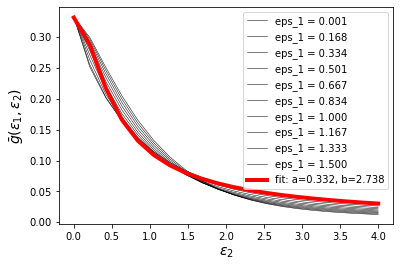

In [149]:
from scipy.optimize import curve_fit

x2_data, x1_data = meshgrid(eps_2_values, eps_1_values)
y_data = g_bar.flatten()
x_data = x2_data.flatten()

def func(x, a, b):
    y = a / sqrt(1 + b**2 * x**2)
    return y

popt, pcov = curve_fit(func, x_data, y_data)
print('a = ', popt[0], ' +- ', sqrt(pcov[0,0]))
print('b = ', popt[1], ' +- ', sqrt(pcov[1,1]))

plt.figure
for i, eps_1 in enumerate(eps_1_values):
    plt.plot(x2_data[i,:], g_bar[i,:], 'k-', label='eps_1 = %5.3f' % eps_1, linewidth=0.5)
plt.plot(x2_data[0,:], func(x2_data[0,:], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt), linewidth=4)
plt.xlabel(r'$\epsilon_2$', fontsize=14)
plt.ylabel(r'$\bar{g}(\epsilon_1,\epsilon_2)$', fontsize=14)
plt.legend()

### set up the calculation of $\bar{R}(\epsilon_1,\epsilon_2)$ and minimize over $\epsilon_2$ to find $\bar{R}_o(\epsilon_1)$

In [73]:
from scipy import interpolate
from scipy.optimize import minimize

x2_data, x1_data = meshgrid(eps_2_values, eps_1_values)
g_bar_interpolate = interpolate.interp2d(x1_data, x2_data, g_bar, kind='linear')

def r_bar(eps_s, eps_1):
    value = exp(eps_s) * eps_s**(-4) * 2.0 * (2.0 * pi)**(1.5)
    eps_2 = sqrt(eps_s) * eps_1
    value *= g_bar_interpolate(eps_1, eps_2)
    return value
    
r_bar_0 = zeros((eps_1_num))
eps_sm = zeros((eps_1_num))

for i, eps_1 in enumerate(eps_1_values):
    res = minimize(r_bar, array([4.0]), args=(eps_1), method='CG', tol=1.0e-6)
    r_bar_0[i] = r_bar(res.x[0], eps_1)
    eps_sm[i] = res.x[0]

#### save

In [83]:
print(r_bar_0, eps_sm)
savez('Rbar0.npz', eps_1_values=eps_1_values, r_bar_0=r_bar_0, eps_sm=eps_sm)

[2.20787841 1.49255557 1.06741415 0.76662801 0.55878002 0.40909876
 0.30068303 0.22463634 0.16789931 0.12704594] [4.00661604 4.19985426 4.33794544 4.59509598 4.66022071 4.75585688
 4.77088673 4.83374814 4.85376372 4.736302  ]


#### plot

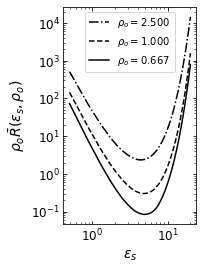

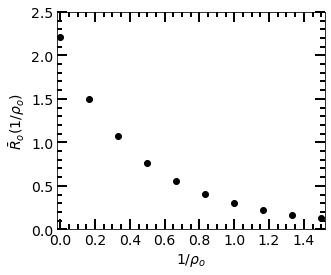

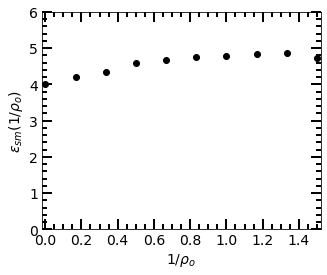

In [144]:
eps_s_min = 0.5
eps_s_max = 20
eps_s_num = 50

eps_s_values = linspace(eps_s_min, eps_s_max, num=eps_s_num)
rho_0_values = array([2.5, 1.0, 0.667])
line_types = ['k-.', 'k--', 'k-']
y_values = zeros((eps_s_num))

fig, ax = plt.subplots()
ax.set_aspect(0.50)
for i, rho_0 in enumerate(rho_0_values):
    for j, eps_s in enumerate(eps_s_values):
        y_values[j] = rho_0 * r_bar(eps_s_values[j], 1.0 / rho_0)
    plt.plot(eps_s_values, y_values, line_types[i], label=r'$\rho_o = $%5.3f' % rho_0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\epsilon_s$', fontsize=14)
plt.ylabel(r'$\rho_o \bar{R}(\epsilon_s, \rho_o)$', fontsize=14)
plt.legend(loc='best')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params(which='major', direction='in')
ax.tick_params(which='minor', direction='in')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig, ax = plt.subplots()
plt.plot(eps_1_values, r_bar_0, 'ko',)
plt.xlabel(r'$1 / \rho_o$', fontsize=14)
plt.ylabel(r'$\bar{R}_o(1 / \rho_o)$', fontsize=14)
plt.xlim([-0.02,1.52])
plt.ylim([0.0,2.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_aspect(0.50)
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='in')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

fig, ax = plt.subplots()
plt.plot(eps_1_values, eps_sm, 'ko')
plt.xlabel(r'$1 / \rho_o$', fontsize=14)
plt.ylabel(r'$\epsilon_{sm}(1 / \rho_o)$', fontsize=14)
plt.xlim([-0.02,1.52])
plt.ylim([0.0,6.0])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_aspect(0.2)
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='in')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#### load

In [49]:
data = load('gbar.npz',)
data_dict = {}
for attribute, value in data.items():
    data_dict[attribute] = value.tolist()
print(data_dict.keys())

# eps_1_values = data_dict['eps_1_values']
# eps_2_values = data_dict['eps_2_values']
# g_bar = data_dict['g_bar']

dict_keys(['eps_1_values', 'eps_2_values', 'g_bar'])


## form the 2D matrix of $\bar{h}(\epsilon_1,\epsilon_2)$

In [50]:
eps_1 = 0.001
eps_2 = 0.1

h_bar = tplquad(h_integrand, z_0, z_1, lambda r:   y_0, lambda r:   y_1,
                                       lambda r,t: xi_0, lambda r,t: xi_1,
                                       args=(eps_1, eps_2), epsabs=1.0e-4, epsrel=1.0e-4)[0]
print(eps_1, eps_2, h_bar)

0.001 0.1 1.073430571456488


In [52]:
eps_1_min = 0.001
eps_1_max = 1.5
eps_1_num = 10

eps_2_min = 0.0
eps_2_max = 4.0
eps_2_num = 20

eps_1_values = linspace(eps_1_min, eps_1_max, num=eps_1_num)
eps_2_values = linspace(eps_2_min, eps_2_max, num=eps_2_num)
h_bar = zeros((eps_1_num, eps_2_num))

for i, eps_1 in enumerate(eps_1_values):
    for j, eps_2 in enumerate(eps_2_values):
        h_bar[i,j] = tplquad(h_integrand, z_0, z_1, lambda r:   y_0, lambda r:   y_1,
                                                    lambda r,t: xi_0, lambda r,t: xi_1,
                                                    args=(eps_1, eps_2), epsabs=1.0e-4, epsrel=1.0e-4)[0]
        print('i, j, eps_1, eps_2, hbar = ',i, j, eps_1, eps_2, h_bar[i,j])

i, j, eps_1, eps_2, hbar =  0 0 0.001 0.0 1.2324668495860345
i, j, eps_1, eps_2, hbar =  0 1 0.001 0.21052631578947367 0.9531017629702864
i, j, eps_1, eps_2, hbar =  0 2 0.001 0.42105263157894735 0.7797128436143695
i, j, eps_1, eps_2, hbar =  0 3 0.001 0.631578947368421 0.6489205023107473
i, j, eps_1, eps_2, hbar =  0 4 0.001 0.8421052631578947 0.5467599727122305
i, j, eps_1, eps_2, hbar =  0 5 0.001 1.0526315789473684 0.46596079059155965
i, j, eps_1, eps_2, hbar =  0 6 0.001 1.263157894736842 0.40164384953283105
i, j, eps_1, eps_2, hbar =  0 7 0.001 1.4736842105263157 0.35015838928541737
i, j, eps_1, eps_2, hbar =  0 8 0.001 1.6842105263157894 0.3086636874297567
i, j, eps_1, eps_2, hbar =  0 9 0.001 1.894736842105263 0.27493313402256525
i, j, eps_1, eps_2, hbar =  0 10 0.001 2.1052631578947367 0.2472403316387056
i, j, eps_1, eps_2, hbar =  0 11 0.001 2.3157894736842106 0.22426360272803184
i, j, eps_1, eps_2, hbar =  0 12 0.001 2.526315789473684 0.20498744059006063
i, j, eps_1, eps_2, 

i, j, eps_1, eps_2, hbar =  4 16 0.6672222222222223 3.3684210526315788 0.10381028653944246
i, j, eps_1, eps_2, hbar =  4 17 0.6672222222222223 3.578947368421052 0.09626465291125141
i, j, eps_1, eps_2, hbar =  4 18 0.6672222222222223 3.789473684210526 0.08976721676453062
i, j, eps_1, eps_2, hbar =  4 19 0.6672222222222223 4.0 0.08411531127018627
i, j, eps_1, eps_2, hbar =  5 0 0.8337777777777778 0.0 1.2324668495860345
i, j, eps_1, eps_2, hbar =  5 1 0.8337777777777778 0.21052631578947367 1.06302421406384
i, j, eps_1, eps_2, hbar =  5 2 0.8337777777777778 0.42105263157894735 0.8637491806446834
i, j, eps_1, eps_2, hbar =  5 3 0.8337777777777778 0.631578947368421 0.6970113938240019
i, j, eps_1, eps_2, hbar =  5 4 0.8337777777777778 0.8421052631578947 0.5635464991244941
i, j, eps_1, eps_2, hbar =  5 5 0.8337777777777778 1.0526315789473684 0.45789777597266246
i, j, eps_1, eps_2, hbar =  5 6 0.8337777777777778 1.263157894736842 0.3746803915375884
i, j, eps_1, eps_2, hbar =  5 7 0.833777777777

i, j, eps_1, eps_2, hbar =  9 11 1.5 2.3157894736842106 0.14244187985253645
i, j, eps_1, eps_2, hbar =  9 12 1.5 2.526315789473684 0.11928489399275669
i, j, eps_1, eps_2, hbar =  9 13 1.5 2.7368421052631575 0.10132769111101264
i, j, eps_1, eps_2, hbar =  9 14 1.5 2.9473684210526314 0.08734233175550232
i, j, eps_1, eps_2, hbar =  9 15 1.5 3.1578947368421053 0.07637205978458927
i, j, eps_1, eps_2, hbar =  9 16 1.5 3.3684210526315788 0.0676850291134402
i, j, eps_1, eps_2, hbar =  9 17 1.5 3.578947368421052 0.06072158798706132
i, j, eps_1, eps_2, hbar =  9 18 1.5 3.789473684210526 0.055064592402892465
i, j, eps_1, eps_2, hbar =  9 19 1.5 4.0 0.05040484281856457


#### save

In [55]:
print(h_bar)
savez('hbar.npz', eps_1_values=eps_1_values, eps_2_values=eps_2_values, h_bar=h_bar)

[[1.23246685 0.95310176 0.77971284 0.6489205  0.54675997 0.46596079
  0.40164385 0.35015839 0.30866369 0.27493313 0.24724033 0.2242636
  0.20498744 0.18863889 0.17463297 0.16252015 0.15194518 0.14264912
  0.1344139  0.12707202]
 [1.23246685 0.96559452 0.78090127 0.64359485 0.53698435 0.45304138
  0.38656241 0.33369625 0.29143793 0.2574217  0.22979467 0.20712047
  0.18830012 0.17249918 0.15908707 0.14757823 0.13760843 0.12889436
  0.12121743 0.11440501]
 [1.23246685 0.9928378  0.79576948 0.64900051 0.53578909 0.44713809
  0.37731503 0.32214312 0.27838768 0.24349524 0.21546031 0.19271348
  0.17405355 0.15856417 0.14555336 0.13449806 0.12500097 0.1167627
  0.1095527  0.10318954]
 [1.23246685 1.02001301 0.81728866 0.66156504 0.54100528 0.44677412
  0.3728112  0.31465028 0.26881656 0.2325675  0.20372499 0.18058465
  0.16182689 0.14644319 0.13366963 0.12293378 0.11380201 0.10594981
  0.09912815 0.093149  ]
 [1.23246685 1.04347646 0.84077857 0.6783197  0.55079575 0.4507327
  0.37219552 0.3105

#### load

In [147]:
data = load('hbar.npz',)
data_dict = {}
for attribute, value in data.items():
    data_dict[attribute] = value.tolist()
print(data_dict.keys())

# eps_1_values = data_dict['eps_1_values']
# eps_2_values = data_dict['eps_2_values']
# h_bar = data_dict['h_bar']

dict_keys(['eps_1_values', 'eps_2_values', 'h_bar'])


### curve fit $\bar{h}(\epsilon_2)$

a =  1.2241711413962373  +-  0.011604791263219585
b =  2.539920755527743  +-  0.04520821772513288


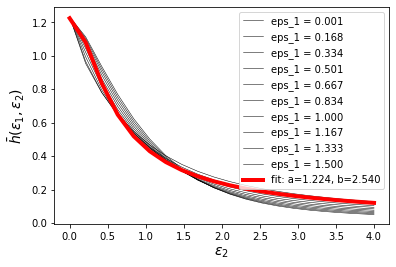

In [146]:
x2_data, x1_data = meshgrid(eps_2_values, eps_1_values)
y_data = h_bar.flatten()
x_data = x2_data.flatten()

def func(x, a, b):
    y = a / sqrt(1 + b**2 * x**2)
    return y

popt, pcov = curve_fit(func, x_data, y_data)
print('a = ', popt[0], ' +- ', sqrt(pcov[0,0]))
print('b = ', popt[1], ' +- ', sqrt(pcov[1,1]))

plt.figure
for i, eps_1 in enumerate(eps_1_values):
    plt.plot(x2_data[i,:], h_bar[i,:], 'k-', label='eps_1 = %5.3f' % eps_1, linewidth=0.5)
plt.plot(x2_data[0,:], func(x2_data[0,:], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt), linewidth=4)
plt.xlabel(r'$\epsilon_2$', fontsize=14)
plt.ylabel(r'$\bar{h}(\epsilon_1,\epsilon_2)$', fontsize=14)
plt.legend()

### set up the calculation of $\Delta \bar{R}(\epsilon_1,\epsilon_2)$ and find $\Delta \bar{R}_o(\epsilon_1)$

In [100]:
from scipy import interpolate

x2_data, x1_data = meshgrid(eps_2_values, eps_1_values)
h_bar_interpolate = interpolate.interp2d(x1_data, x2_data, h_bar, kind='linear')

def delta_r_bar(eps_s, eps_1):
    value = exp(eps_s) * eps_s**(-2.5) * sqrt(2.0) * (2.0 * pi)**(1.5)
    eps_2 = sqrt(eps_s) * eps_1
    value *= h_bar_interpolate(eps_1, eps_2)
    return value

delta_r_bar_0 = zeros((eps_1_num))

for i, eps_1 in enumerate(eps_1_values):
    delta_r_bar_0[i] = delta_r_bar(eps_sm[i], eps_1)

#### save

In [101]:
print(delta_r_bar_0)
savez('DeltaRbar0.npz', eps_1_values=eps_1_values, delta_r_bar_0=delta_r_bar_0)

[46.84652714 34.70029488 26.72933812 21.43310882 15.99614771 12.18150111
  9.02119834  6.82044769  5.12493967  3.72702863]


#### plot

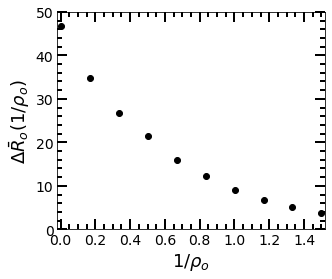

In [130]:
fig, ax = plt.subplots()
plt.plot(eps_1_values, delta_r_bar_0, 'ko',)
plt.xlabel(r'$1 / \rho_o$', fontsize=18)
plt.ylabel(r'$\Delta \bar{R}_o(1 / \rho_o)$', fontsize=18)
plt.xlim([-0.02,1.52])
plt.ylim([0.0,50])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_aspect(0.025)
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='in')
ax.tick_params(which='minor', length=5, width=2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

## The final value for flux, $\Phi_b$ @ $\rho_o = 2/3$

In [106]:
idx=9
print('rho_0 = ', 1.0 / eps_1_values[idx])
print('Phi_b = n^2 v b^5 [( ', rho_0 * r_bar_0[idx], ' ) + (r_ce/b)( ', rho_0 * delta_r_bar_0[idx], ' )]')

rho_0 =  0.6666666666666666
Phi_b = n^2 v b^5 [(  0.08473964131819078  ) + (r_ce/b)(  2.485928093196495  )]
